In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [2]:
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("disaster_messages.csv")

In [4]:
df

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct
...,...,...,...,...
26243,30261,The training demonstrated how to enhance micro...,NaN,news
26244,30262,A suitable candidate has been selected and OCH...,NaN,news
26245,30263,"Proshika, operating in Cox's Bazar municipalit...",NaN,news
26246,30264,"Some 2,000 women protesting against the conduc...",NaN,news


In [5]:
print("✅ Dataset Loaded Successfully!")
print("Shape of Dataset:", df.shape)


✅ Dataset Loaded Successfully!
Shape of Dataset: (26248, 4)


In [6]:
df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [7]:
print("\n--- DATA INFO ---")
df.info()
print("\n--- SUMMARY STATISTICS ---")
print(df.describe(include="all"))
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())


--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        26248 non-null  int64 
 1   message   26248 non-null  object
 2   original  10184 non-null  object
 3   genre     26248 non-null  object
dtypes: int64(1), object(3)
memory usage: 820.4+ KB

--- SUMMARY STATISTICS ---
                  id message  \
count   26248.000000   26248   
unique           NaN   26177   
top              NaN  #NAME?   
freq             NaN       4   
mean    15224.078368     NaN   
std      8826.069156     NaN   
min         2.000000     NaN   
25%      7445.750000     NaN   
50%     15660.500000     NaN   
75%     22923.250000     NaN   
max     30265.000000     NaN   

                                                 original  genre  
count                                               10184  26248  
unique                                        

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


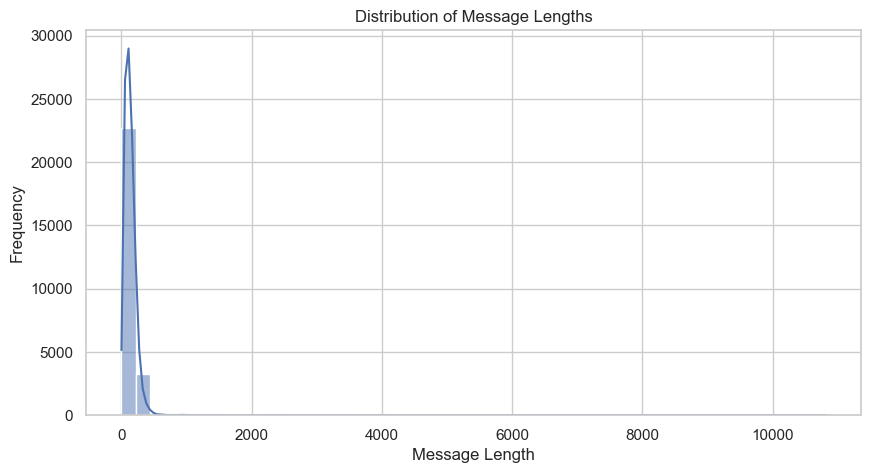

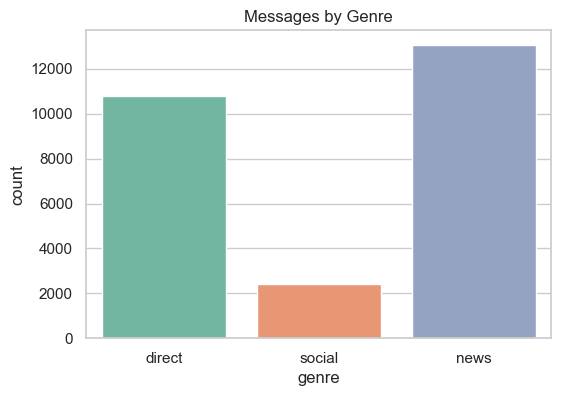

In [8]:
df['message_length'] = df['message'].astype(str).apply(len)

plt.figure(figsize=(10,5))
sns.histplot(df['message_length'], bins=50, kde=True)
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

# Count of genres (if available)
if "genre" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="genre", data=df, palette="Set2")
    plt.title("Messages by Genre")
    plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("disaster_messages.csv")

In [2]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# Check class distribution (if 'category' column exists)
if "category" in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x="category", order=df["category"].value_counts().index)
    plt.xticks(rotation=45)
    plt.title("Category Distribution")
    plt.show()

Dataset Shape: (26248, 4)

Missing Values:
 id              0
message         0
original    16064
genre           0
dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


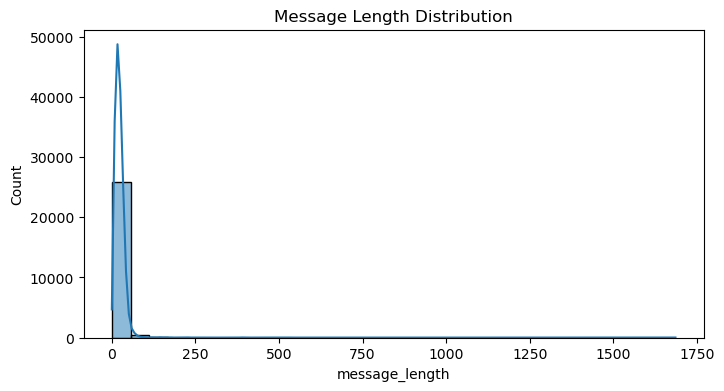

In [3]:
df["message_length"] = df["message"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,4))
sns.histplot(df["message_length"], bins=30, kde=True)
plt.title("Message Length Distribution")
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = vectorizer.fit_transform(df["message"].astype(str))

print("TF-IDF Matrix Shape:", X_tfidf.shape)

TF-IDF Matrix Shape: (26248, 5000)


In [6]:
from sklearn.feature_selection import chi2
import numpy as np

if "category" in df.columns:
    y = df["category"]

    chi2_scores, p_values = chi2(X_tfidf, y)
    feature_names = np.array(vectorizer.get_feature_names_out())

    top_features = feature_names[np.argsort(chi2_scores)[-20:]]
    print("\nTop 20 Selected Features:\n", top_features)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

messages = pd.read_csv("disaster_messages.csv")
categories = pd.read_csv("disaster_categories.csv")

print("Messages Shape:", messages.shape)
print("Categories Shape:", categories.shape)

Messages Shape: (26248, 4)
Categories Shape: (26248, 2)


In [8]:
categories_split = categories['categories'].str.split(';', expand=True)

# Extract column names for categories
row = categories_split.iloc[0]
category_colnames = row.apply(lambda x: x.split('-')[0])
categories_split.columns = category_colnames

# Convert category values to 0/1
for column in categories_split:
    categories_split[column] = categories_split[column].str[-1].astype(int)

# Rebuild categories dataframe
categories_clean = pd.concat([categories[['id']], categories_split], axis=1)

# Merge messages and categories
df = messages.merge(categories_clean, on="id")

print("Merged dataset shape:", df.shape)
print("Columns in final dataset:\n", df.columns.tolist())

Merged dataset shape: (26386, 40)
Columns in final dataset:
 ['id', 'message', 'original', 'genre', 'related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']



Missing Values:
 original                  16140
id                            0
aid_centers                   0
infrastructure_related        0
transport                     0
dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


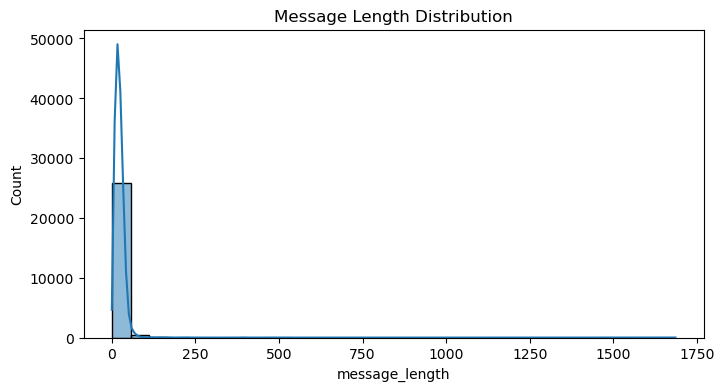

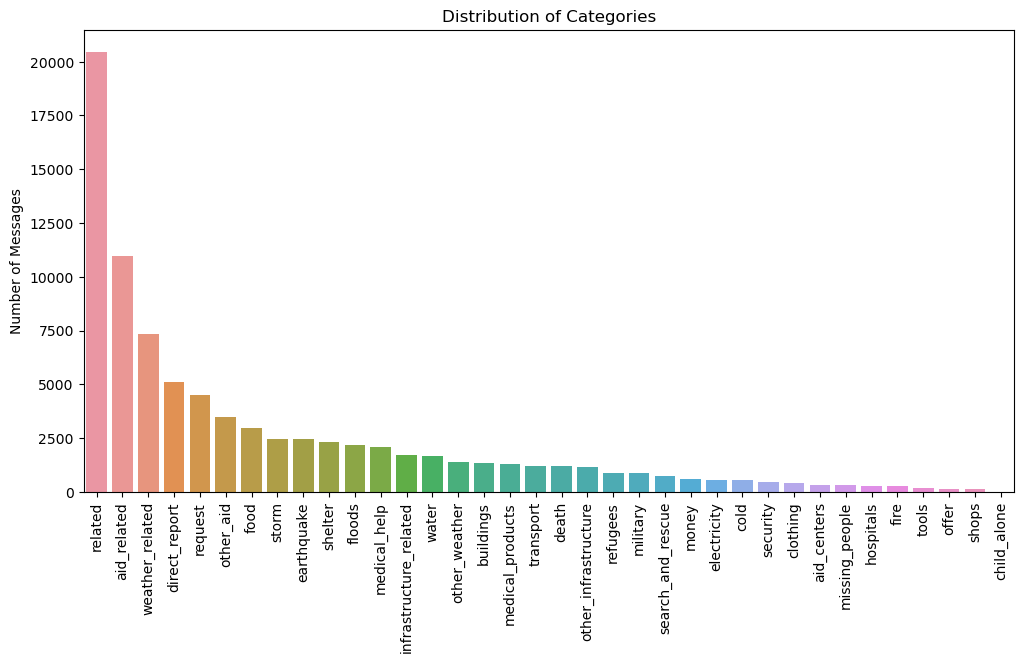

In [9]:
print("\nMissing Values:\n", df.isnull().sum().sort_values(ascending=False).head())

# Distribution of message length
df["message_length"] = df["message"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,4))
sns.histplot(df["message_length"], bins=30, kde=True)
plt.title("Message Length Distribution")
plt.show()

# Distribution of categories
category_sums = df[category_colnames].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=category_sums.index, y=category_sums.values)
plt.xticks(rotation=90)
plt.title("Distribution of Categories")
plt.ylabel("Number of Messages")
plt.show()

In [10]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = vectorizer.fit_transform(df["message"].astype(str))

print("TF-IDF Matrix Shape:", X_tfidf.shape)

TF-IDF Matrix Shape: (26386, 5000)


In [11]:
y = df["aid_related"]

chi2_scores, p_values = chi2(X_tfidf, y)
feature_names = np.array(vectorizer.get_feature_names_out())

# Top 20 features most correlated with 'aid_related'
top_features = feature_names[np.argsort(chi2_scores)[-20:]]
print("\nTop 20 Selected Features for 'aid_related':\n", top_features)


Top 20 Selected Features for 'aid_related':
 ['like' 'dying' 'relief' 'tent' 'hunger' 'victims' 'job' '000' 'supplies'
 'information' 'hungry' 'notes' 'aid' 'people' 'shelter' 'need' 'tents'
 'water' 'help' 'food']
